In [43]:
# pip install konlpy

In [44]:
# pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [78]:
import re
import pandas as pd
import numpy as np
from tqdm import tqdm
from konlpy.tag import Okt
from pykospacing import Spacing
from collections import Counter

# 시각화
import matplotlib.pyplot as plt
from matplotlib import rc  
import seaborn as sns

# word cloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [46]:
# #코랩 한글 깨짐 현상 해결방법 > 안될 시 런타임 다시 시작해보기

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [47]:
df1 = pd.read_csv("/content/test_daechang_concat.csv")

In [48]:
df1.head()

,name,addresse,cat1,cat2,review_num,score_min,score,review,reviews_date,reviews_id
0,장다리,서울 강남구 압구정로46길 5-14 1층 (우)06018,"곱창,막창","['한우특양구이 (180g)\n23,000', '대창.막창 (180g)\n20,00...",154,4.4,5.0,가격은 조금 비쌌는데 맛은 맛있었어요. 곱창 다 먹고 시켜먹는 깍두기볶음밥도 맛있었음,2022.05.08.,신그림
1,장다리,서울 강남구 압구정로46길 5-14 1층 (우)06018,"곱창,막창","['한우특양구이 (180g)\n23,000', '대창.막창 (180g)\n20,00...",154,4.4,5.0,곱창에 곱도 실하게 들었고 곱창에 붙은 기름이 다녹고 살짝 탄듯한 그런 질감이 소주...,2022.05.07.,정다운
2,장다리,서울 강남구 압구정로46길 5-14 1층 (우)06018,"곱창,막창","['한우특양구이 (180g)\n23,000', '대창.막창 (180g)\n20,00...",154,4.4,5.0,곱창 매니아 인데 여기완전 맛있네요!! 식감도 쫄깃하고 ㅎㅎ 곱창 중독성 쩔어요!!...,2022.05.04.,봉숭아
3,장다리,서울 강남구 압구정로46길 5-14 1층 (우)06018,"곱창,막창","['한우특양구이 (180g)\n23,000', '대창.막창 (180g)\n20,00...",154,4.4,5.0,잡냄새도 안나고 양도 다른데보다 많은거 같고 배부르게 잘먹고 왔어요~~^^,2022.05.04.,남주르
4,장다리,서울 강남구 압구정로46길 5-14 1층 (우)06018,"곱창,막창","['한우특양구이 (180g)\n23,000', '대창.막창 (180g)\n20,00...",154,4.4,5.0,곱창에는 곱이 많아서 고소하고 볶음밥까지 알차게 먹고 왔네요. 다이어트 중이라 치팅...,2022.05.03.,코코팜


In [49]:
df1.tail()

,name,addresse,cat1,cat2,review_num,score_min,score,review,reviews_date,reviews_id
1629,세광양대창 교대본점,"서울 서초구 반포대로28길 79 1,2층",NaN,NaN,"1,177",NaN,NaN,진짜 가격대비 개존맛입니다!!! 다 맛있어요,NaN,NaN
1630,세광양대창 교대본점,"서울 서초구 반포대로28길 79 1,2층",NaN,NaN,"1,177",NaN,NaN,평일점심이라 사람 없어서 신경써주셔서 좋았어요 나중에 저녁에도 가고 싶음,NaN,NaN
1631,세광양대창 교대본점,"서울 서초구 반포대로28길 79 1,2층",NaN,NaN,"1,177",NaN,NaN,완전 맛있어요,NaN,NaN
1632,세광양대창 교대본점,"서울 서초구 반포대로28길 79 1,2층",NaN,NaN,"1,177",NaN,NaN,대창 낫베드,NaN,NaN
1633,세광양대창 교대본점,"서울 서초구 반포대로28길 79 1,2층",NaN,NaN,"1,177",NaN,NaN,블로그 보고 먹어봤어요!! ㅎㅎㅎ,NaN,NaN


In [50]:
a = set(df1["name"])
a

{'별미곱창 3호점', '세광양대창 교대본점', '장다리', '장다리곱창', '제일양대창'}

In [51]:
def extract_word(text):
  hangul = re.compile('[^가-힣]')
  result = hangul.sub(' ', str(text)) # 문자열 패턴 바꾸기
  return result

In [52]:
print("Before Extraction : ",df1['review'][1])
print("After Extraction : ", extract_word(df1['review'][1]))

print("Before Extraction : ",df1['review'][2])
print("After Extraction : ", extract_word(df1['review'][2]))

Before Extraction :  곱창에 곱도 실하게 들었고 곱창에 붙은 기름이 다녹고 살짝 탄듯한 그런 질감이 소주 안하면 서운할 정도 소주가 물처럼 들어가요 ㅎㅎ
After Extraction :  곱창에 곱도 실하게 들었고 곱창에 붙은 기름이 다녹고 살짝 탄듯한 그런 질감이 소주 안하면 서운할 정도 소주가 물처럼 들어가요   
Before Extraction :  곱창 매니아 인데 여기완전 맛있네요!! 식감도 쫄깃하고 ㅎㅎ 곱창 중독성 쩔어요!! 고소하고 느끼함 없어서 진짜 폭풍흡입했네요 넘 맛있게 먹고왔어요^^
After Extraction :  곱창 매니아 인데 여기완전 맛있네요   식감도 쫄깃하고    곱창 중독성 쩔어요   고소하고 느끼함 없어서 진짜 폭풍흡입했네요 넘 맛있게 먹고왔어요  


In [53]:
df1['hangul review'] = df1['review'].apply(lambda x:extract_word(x))

In [54]:
spacing = Spacing()
print("Before Fixing : ", df1['review'][1])
print("After Fixing : ", spacing(df1['review'][1]))
print("Before Fixing : ", df1['review'][4])
print("After Fixing : ", spacing(df1['review'][4]))

Before Fixing :  곱창에 곱도 실하게 들었고 곱창에 붙은 기름이 다녹고 살짝 탄듯한 그런 질감이 소주 안하면 서운할 정도 소주가 물처럼 들어가요 ㅎㅎ
After Fixing :  곱창에 곱도 실하게 들었고 곱창에 붙은 기름이 다 녹고 살짝 탄 듯한 그런 질감이 소주 안 하면 서운할 정도 소주가 물처럼 들어가요 ㅎㅎ
Before Fixing :  곱창에는 곱이 많아서 고소하고 볶음밥까지 알차게 먹고 왔네요. 다이어트 중이라 치팅데이로 좀 적당히 먹으려고 했는데 적당히 먹을수가 없는 맛이었어요. 또 갈거에요
After Fixing :  곱창에는 곱이 많아서 고소하고 볶음밥까지 알차게 먹고 왔네요. 다이어트 중이라 치팅 데이로 좀 적당히 먹으려고 했는데 적당히 먹을 수가 없는 맛이었어요. 또 갈거에요


In [55]:
df1['spacing review'] = df1['hangul review'].apply(lambda x: spacing(x))

In [56]:
okt = Okt()
words = " ".join(df1['spacing review'].tolist())
words = okt.morphs(words, stem  = True) # 형태소 추출

In [57]:
remove_one_word = [x for x in words if len(x)>1 or x == "맛" or x == "곱" or x == "맵" or x == "양" or x == "질" or x == "굿" or x == "밥" or x == "술"]
len(remove_one_word)

20564

In [58]:
remove_one_word

['가격',
 '조금',
 '비싸다',
 '맛',
 '맛있다',
 '곱창',
 '먹다',
 '시키다',
 '먹다',
 '깍두기',
 '볶음밥',
 '맛있다',
 '곱창',
 '곱',
 '실하다',
 '들다',
 '곱창',
 '붙다',
 '기름',
 '녹다',
 '살짝',
 '타다',
 '그렇다',
 '질감',
 '소주',
 '하다',
 '서운하다',
 '정도',
 '소주',
 '처럼',
 '들어가다',
 '곱창',
 '매니아',
 '인데',
 '여기',
 '완전',
 '맛있다',
 '감다',
 '쫄깃',
 '하고',
 '곱창',
 '중독',
 '쩔어요',
 '고소하다',
 '느끼하다',
 '없다',
 '진짜',
 '폭풍',
 '흡입',
 '하다',
 '넘다',
 '맛있다',
 '먹다',
 '오다',
 '냄새',
 '나다',
 '양도',
 '다르다',
 '보다',
 '많다',
 '같다',
 '부르다',
 '자다',
 '먹다',
 '오다',
 '곱창',
 '에는',
 '곱',
 '많다',
 '고소하다',
 '볶음밥',
 '까지',
 '알차다',
 '먹다',
 '오다',
 '다이어트',
 '중이',
 '치팅',
 '데이',
 '적당하다',
 '먹다',
 '하다',
 '적당하다',
 '먹다',
 '수가',
 '없다',
 '맛',
 '이다',
 '갈다',
 '대창',
 '신선하다',
 '깃쫄깃',
 '고소하다',
 '곱창',
 '맛있다',
 '마지막',
 '날치',
 '김치볶음밥',
 '먹다',
 '역시',
 '피날레',
 '볶음밥',
 '곱창',
 '서다',
 '누리다',
 '나다',
 '않다',
 '오동통하다',
 '맛있다',
 '개인',
 '으로',
 '대창',
 '좋아하다',
 '여기다',
 '곱창',
 '맛있다',
 '대창',
 '먹다',
 '맛있다',
 '술',
 '마시기',
 '좋다',
 '푸다',
 '푸다',
 '나중',
 '회식',
 '장소',
 '많이',
 '오다',
 '좋다',
 '자다',
 '먹다',
 '가다',
 '너무',
 '너무',
 '고소하

In [59]:
frequent = Counter(remove_one_word).most_common()
frequent

[('맛있다', 1054),
 ('곱창', 876),
 ('먹다', 823),
 ('하다', 680),
 ('좋다', 462),
 ('맛', 436),
 ('너무', 423),
 ('있다', 284),
 ('친절하다', 263),
 ('가다', 230),
 ('오다', 229),
 ('자다', 226),
 ('진짜', 225),
 ('맛집', 214),
 ('곱', 172),
 ('직원', 169),
 ('볶음밥', 159),
 ('이다', 157),
 ('방문', 156),
 ('없다', 148),
 ('보다', 147),
 ('대창', 146),
 ('굽다', 145),
 ('많다', 139),
 ('넘다', 120),
 ('양', 119),
 ('나다', 114),
 ('같다', 107),
 ('여기', 105),
 ('으로', 105),
 ('냄새', 103),
 ('에서', 98),
 ('싶다', 98),
 ('전골', 98),
 ('되다', 94),
 ('않다', 93),
 ('가격', 91),
 ('하고', 91),
 ('고소하다', 91),
 ('정말', 91),
 ('친구', 89),
 ('최고', 86),
 ('들다', 84),
 ('양대', 83),
 ('까지', 81),
 ('압구정', 80),
 ('다음', 79),
 ('추천', 76),
 ('잡다', 76),
 ('주다', 73),
 ('이랑', 67),
 ('많이', 65),
 ('분위기', 65),
 ('사람', 65),
 ('시키다', 63),
 ('양도', 63),
 ('갈다', 62),
 ('나오다', 62),
 ('완전', 59),
 ('서비스', 59),
 ('좋아하다', 58),
 ('장다리', 58),
 ('인데', 57),
 ('사장', 57),
 ('대다', 56),
 ('그렇다', 54),
 ('소주', 54),
 ('역시', 54),
 ('막창', 54),
 ('아니다', 53),
 ('신선하다', 52),
 ('엄청', 52),
 ('술', 51),
 ('비싸

In [60]:
df3 = pd.read_csv("/content/stopwords.csv", encoding = "cp949")

In [61]:
stopwords = df3
remove_stopwords = [x for x in remove_one_word if x not in stopwords]
len(remove_stopwords)

14492

In [62]:
Counter(remove_stopwords).most_common()

[('맛있다', 1054),
 ('곱창', 876),
 ('먹다', 823),
 ('좋다', 462),
 ('맛', 436),
 ('친절하다', 263),
 ('자다', 226),
 ('맛집', 214),
 ('곱', 172),
 ('직원', 169),
 ('볶음밥', 159),
 ('방문', 156),
 ('대창', 146),
 ('굽다', 145),
 ('많다', 139),
 ('양', 119),
 ('냄새', 103),
 ('전골', 98),
 ('가격', 91),
 ('고소하다', 91),
 ('친구', 89),
 ('최고', 86),
 ('양대', 83),
 ('압구정', 80),
 ('추천', 76),
 ('잡다', 76),
 ('분위기', 65),
 ('사람', 65),
 ('양도', 63),
 ('갈다', 62),
 ('서비스', 59),
 ('좋아하다', 58),
 ('장다리', 58),
 ('사장', 57),
 ('소주', 54),
 ('막창', 54),
 ('신선하다', 52),
 ('술', 51),
 ('비싸다', 50),
 ('들어가다', 47),
 ('주문', 47),
 ('분들', 45),
 ('가성', 45),
 ('테라스', 44),
 ('직접', 43),
 ('자주', 43),
 ('여기다', 40),
 ('가득', 40),
 ('깔끔하다', 39),
 ('적다', 39),
 ('편하다', 39),
 ('생각', 39),
 ('기분', 38),
 ('양념', 38),
 ('구이', 38),
 ('인분', 37),
 ('의사', 37),
 ('별로', 36),
 ('음식', 36),
 ('특양', 36),
 ('질', 35),
 ('부추', 35),
 ('밥', 34),
 ('유명하다', 34),
 ('지다', 34),
 ('느끼하다', 33),
 ('모듬', 33),
 ('기름', 32),
 ('안나', 32),
 ('처음', 32),
 ('해주다', 31),
 ('에도', 31),
 ('오랜', 30),
 ('아주', 29),

In [63]:
len(Counter(remove_stopwords).most_common())

1997

In [64]:
for item, count in Counter(remove_stopwords).most_common():
  if count == 1:
    print(item)

서운하다
쩔어요
김치볶음밥
피날레
순서
복음
상치
표정
가라
시끌벅적
차이
비계
비려
파리
아줌마
아저씨
식기
일욜
청소
진동
어제
불쇼
생으로
벗다
손바닥
환전
창렬
것임
판이
갈바
열망
크게
외치다
안심
스랑
후회되다
지저분하다
미네
마무
으리
흐르다
지방
놀러와
블로거
쫄깃쫄깃해
베스
다태
금손
글치
레전드
교육
끝판
모래
가시
방석
블록
복판
미숙
올라서다
주민
접종
음성
입장
머리카락
가락동
진양곱챵
튀어나오다
밀리다
내면
라며
큐웁
츕츕
삭제
누락
커피
봉지
만요
허름
내놓다
화사
다닥다닥
떼다
시장
취약
개뻥
가운데
솟다
철판
속이다
바퀴
두르다
부임
원짜릴
어묵
외국인
세계
오예
두기
되욬
잠실
개비
용서
드문드문
체온
재고
제거
타이밍
다행하다
괜춘
상상
초월
분리
기도
무난
가깝다
분점
흔하다
양적
롭니
대구
팅기다
프랜차이즈
튀김
방이동
라지
서너
바깥
프라스
더위
싸우다
바짝
일어나다
펴다
볼일
하나로
허니
예스
리즈
적어지다
뻔하다
순두부찌개
주네
잔치
짧다
상이
난이도
두시
가림
밀다
대서
밀리
버터
포인트
갈릴
유치원
선하다
입성
구성은
휘황
찬란하다
순두부
볶음
인거
꼬시려
은데
이냐
고요
가드
근절
마음속
요새
줄이다
사이즈
숙주
정돈
주관
으론
비주
보아
슬림
옆집
공휴일
허탕
예쁘다
세팅
고이
메뉴판
무얼
선호
주변인
대표
입담
흥겹다
대파
곱집
과도
일렬
계서
장하다
수치
무한리필
주심
접시
아픔
인스타
대접받다
감사히
거품
업그레이드
버젼
겹치
고심
흔적
곳곳
아끼다
평범
월요일
마리
통째
팔면
만해
지역
달리기
대단하다
여인
그람
내리다
이래서
느릿느릿
지나다
데도
그럭저럭
맛임
하트
까지는
베다
서초
엇음
떠오르다
샛별
지난
물건
상관
넷이
촉촉하다
젖다
시원
잊어버리다
구장
젊다
날짜
댓글
작업
거릅니
배탈
대요
여름
조심하다
꼬소하
싸가지
속지
싯슴
마탱
흠잡다
좋슴
피해자
막다
없어지다
사주면
무색
무취
서툴다
동일하다
짧아지다
연타발
반값
쌀밥
아늑하다
피로
가시다
결과
물통
춧가루
특색
차려
모시
와도
반칙
아

In [65]:
minimum_count = 3
more_than_one_time= []
for i in tqdm(range(len(remove_stopwords))):
    tmp = remove_stopwords[i]
    if remove_stopwords.count(tmp) >= minimum_count:
        more_than_one_time.append(tmp)

100%|██████████| 14492/14492 [00:08<00:00, 1786.54it/s]


In [66]:
Counter(more_than_one_time).most_common()

[('맛있다', 1054),
 ('곱창', 876),
 ('먹다', 823),
 ('좋다', 462),
 ('맛', 436),
 ('친절하다', 263),
 ('자다', 226),
 ('맛집', 214),
 ('곱', 172),
 ('직원', 169),
 ('볶음밥', 159),
 ('방문', 156),
 ('대창', 146),
 ('굽다', 145),
 ('많다', 139),
 ('양', 119),
 ('냄새', 103),
 ('전골', 98),
 ('가격', 91),
 ('고소하다', 91),
 ('친구', 89),
 ('최고', 86),
 ('양대', 83),
 ('압구정', 80),
 ('추천', 76),
 ('잡다', 76),
 ('분위기', 65),
 ('사람', 65),
 ('양도', 63),
 ('갈다', 62),
 ('서비스', 59),
 ('좋아하다', 58),
 ('장다리', 58),
 ('사장', 57),
 ('소주', 54),
 ('막창', 54),
 ('신선하다', 52),
 ('술', 51),
 ('비싸다', 50),
 ('들어가다', 47),
 ('주문', 47),
 ('분들', 45),
 ('가성', 45),
 ('테라스', 44),
 ('직접', 43),
 ('자주', 43),
 ('여기다', 40),
 ('가득', 40),
 ('깔끔하다', 39),
 ('적다', 39),
 ('편하다', 39),
 ('생각', 39),
 ('기분', 38),
 ('양념', 38),
 ('구이', 38),
 ('인분', 37),
 ('의사', 37),
 ('별로', 36),
 ('음식', 36),
 ('특양', 36),
 ('질', 35),
 ('부추', 35),
 ('밥', 34),
 ('유명하다', 34),
 ('지다', 34),
 ('느끼하다', 33),
 ('모듬', 33),
 ('기름', 32),
 ('안나', 32),
 ('처음', 32),
 ('해주다', 31),
 ('에도', 31),
 ('오랜', 30),
 ('아주', 29),

In [67]:
cnt_list = Counter(more_than_one_time).most_common()

In [68]:
type(cnt_list), len(cnt_list), 

(list, 651)

In [69]:
cnt_list = np.array(cnt_list)
cnt_list.shape

(651, 2)

In [70]:
col_name = ['word', 'count']
pd_cnt_list = pd.DataFrame(cnt_list, columns = col_name)
pd_cnt_list = pd_cnt_list.set_index("word")
pd_cnt_list.shape

(651, 1)

In [71]:
pd_cnt_list["count"]

word
맛있다     1054
곱창       876
먹다       823
좋다       462
맛        436
        ... 
입히다        3
특이하다       3
죽여주다       3
감성         3
만점         3
Name: count, Length: 651, dtype: object

In [72]:
pd_cnt_list['count'] = pd.to_numeric(pd_cnt_list['count'])

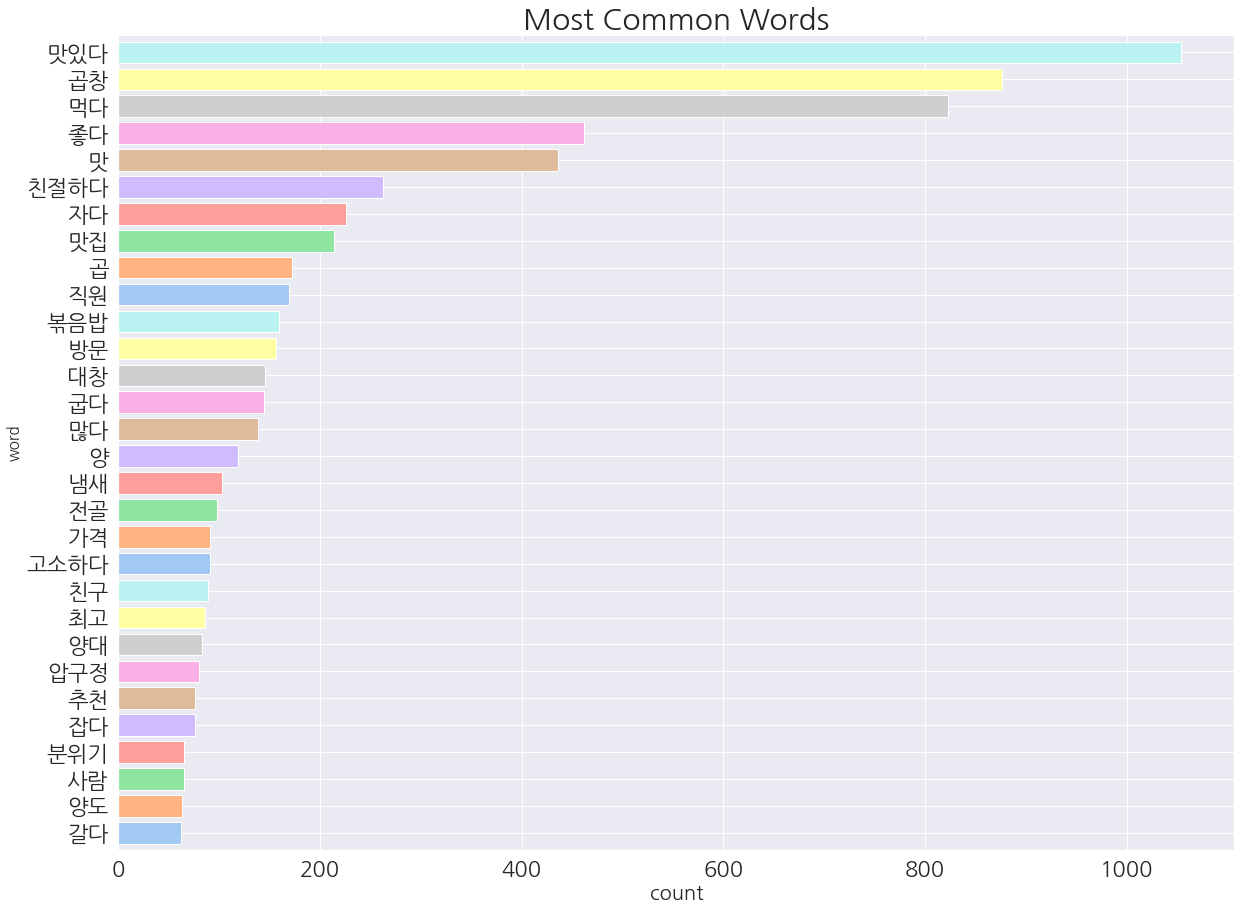

In [73]:
sns.set(font_scale=2)
plt.rc('font', family = font_name)

colors = sns.color_palette('pastel', len(pd_cnt_list['count'][:30]))

pd_cnt_list['count'][:30].sort_values().plot(
    kind = 'barh', 
    figsize=(20,15),
    width = 0.8,
    color =  colors,
    grid = True)
plt.title("Most Common Words", fontsize = 30)
plt.xlabel('count', fontsize=20)
plt.ylabel('word', fontsize=15)
plt.show()

In [74]:
# word cloud용 dataframe을 위해 다시 reset
wc_df = pd_cnt_list.reset_index()
wc_df

,word,count
0,맛있다,1054
1,곱창,876
2,먹다,823
3,좋다,462
4,맛,436
...,...,...
646,입히다,3
647,특이하다,3
648,죽여주다,3
649,감성,3


In [75]:
# 생성된 데이터 프레임을 딕셔너리로 전환
wc = wc_df.set_index("word").to_dict()["count"]
wc

{'가게': 18,
 '가격': 91,
 '가능': 4,
 '가능하다': 7,
 '가도': 9,
 '가득': 40,
 '가득하다': 18,
 '가면': 21,
 '가성': 45,
 '가세': 8,
 '가져가다': 3,
 '가족': 11,
 '가치': 7,
 '간다': 4,
 '간단하다': 3,
 '간이': 4,
 '갈다': 62,
 '갈래': 3,
 '감다': 6,
 '감동': 5,
 '감사하다': 12,
 '감성': 3,
 '감자': 5,
 '감탄': 3,
 '강남': 8,
 '강력': 4,
 '강추': 18,
 '개존': 5,
 '거기': 8,
 '거리': 8,
 '걱정': 4,
 '건데': 5,
 '건지다': 12,
 '걸다': 6,
 '걸리다': 6,
 '검색': 6,
 '게요': 10,
 '겠다': 4,
 '경우': 4,
 '계산': 10,
 '계산서': 3,
 '계시다': 6,
 '고급': 3,
 '고기': 24,
 '고무줄': 3,
 '고민': 3,
 '고소하다': 91,
 '곱': 172,
 '곱창': 876,
 '공기': 3,
 '공원': 3,
 '과는': 4,
 '관리': 5,
 '광양': 9,
 '괜찮다': 27,
 '굉장하다': 5,
 '교대': 20,
 '교대역': 6,
 '구성': 6,
 '구요': 13,
 '구이': 38,
 '국내': 15,
 '국물': 11,
 '군데': 5,
 '굳이': 8,
 '굽다': 145,
 '굿': 23,
 '굿굿': 14,
 '궁합': 3,
 '그건': 3,
 '그것': 3,
 '그게': 3,
 '그닥': 4,
 '극찬': 3,
 '근래': 3,
 '근방': 3,
 '근처': 12,
 '긁다': 4,
 '금방': 4,
 '긋다': 3,
 '기고': 13,
 '기다': 12,
 '기다리다': 26,
 '기대': 12,
 '기대하다': 3,
 '기르다': 3,
 '기름': 32,
 '기름기': 5,
 '기본': 21,
 '기분': 38,
 '기준': 6,
 '기지': 12,
 '김치': 8,
 '깃쫄깃':

(-0.5, 799.5, 799.5, -0.5)

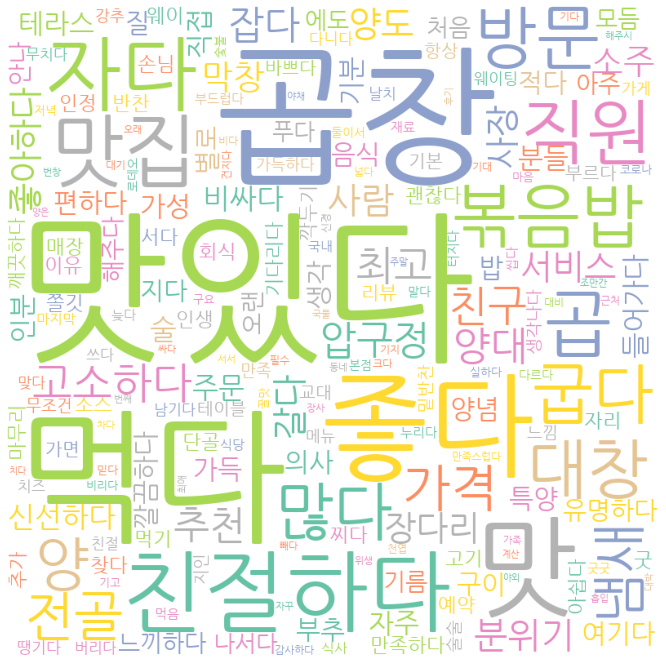

In [76]:
# word cloud
wordcloud = WordCloud(
    font_path = font_name,
    width = 800, 
    height = 800, 
    max_font_size = 200,
    background_color = "white",
    colormap = 'Set2'
    ).generate_from_frequencies(wc)

plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.axis('off')

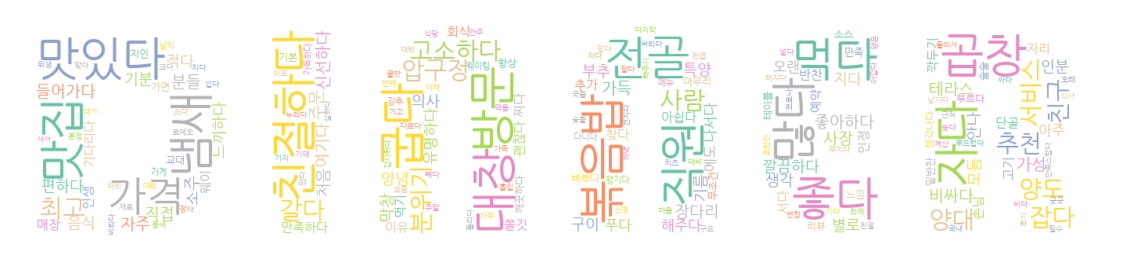

In [79]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
mask = np.array(Image.open("/content/dinner.png"))
wordcloud = WordCloud(
    width = 3000, height = 2000, 
    font_path = font_name, max_font_size = 100,
    random_state=1, background_color='white', 
    colormap='Set2', collocations=False, 
    stopwords = STOPWORDS,mask=mask).generate(' '.join(wc))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("news.png", format="png") 
plt.show()